In [178]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import pickle
# import xgboost as xgb
from xgboost import XGBClassifier

In [179]:
MNIST = sio.loadmat('MNIST.mat')
MNIST.keys()

listofboosts = []

In [180]:
# load feature and class vectors from MNISTmini
trainFea = MNIST['train_fea']
trainClass = MNIST['train_gnd']
testFea = MNIST['test_fea']
testClass = MNIST['test_gnd']

trainClass -= 1
testClass -= 1

In [181]:
# shuffle and crop data to include random points
trainFea, trainClass = shuffle(trainFea, trainClass, random_state=0)
testFea, testClass = shuffle(testFea, testClass, random_state=0)
trainFea, trainClass = trainFea[0:60000], trainClass[0:60000]
testFea, testClass = testFea[0:10000], testClass[0:10000]

In [182]:
for item in (range(10, 30, 5)):
    xgboost = XGBClassifier(max_leaves = item)
    listofboosts.append(xgboost)

#pickle.dump(xgboost, "xgboost_classifier.pkl", "wb")
#trn_model = pickle.load("xgboost_classifier.pkl", "rb")

In [183]:
for xgboost in listofboosts:
    xgboost.fit(trainFea, trainClass.ravel())

In [184]:
output_score_test = []
output_score_validation = []
output_hparam = []

for xgboost in listofboosts:
    
    output_score_test.append(1-xgboost.score(testFea, testClass))
    output_score_validation.append(1-xgboost.score(trainFea, trainClass))
    output_hparam.append(xgboost.get_params()['max_leaves'])

output_score_test


[0.021100000000000008,
 0.021100000000000008,
 0.021100000000000008,
 0.021100000000000008]

In [185]:
output_score_validation

[0.0, 0.0, 0.0, 0.0]

In [186]:
output_hparam

[10, 15, 20, 25]

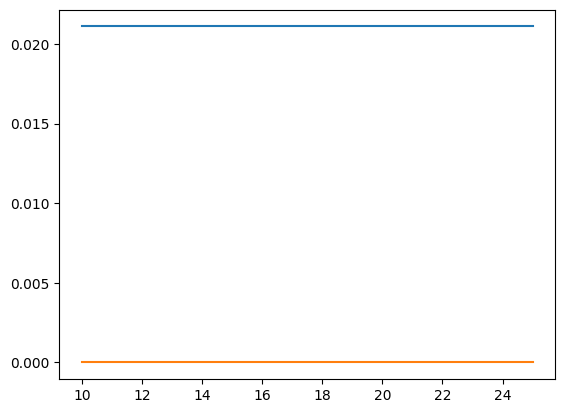

In [187]:
plt.plot(output_hparam, output_score_test, label="XGBoost")
plt.plot(output_hparam, output_score_validation, label="XGBoost")